## Handwritten digit recognition using CNN

In [1]:
# importing the necessary libraries

import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.datasets import mnist
from keras.utils import to_categorical 

In [2]:
# Load and preprocess the MNIST dataset

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32') / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

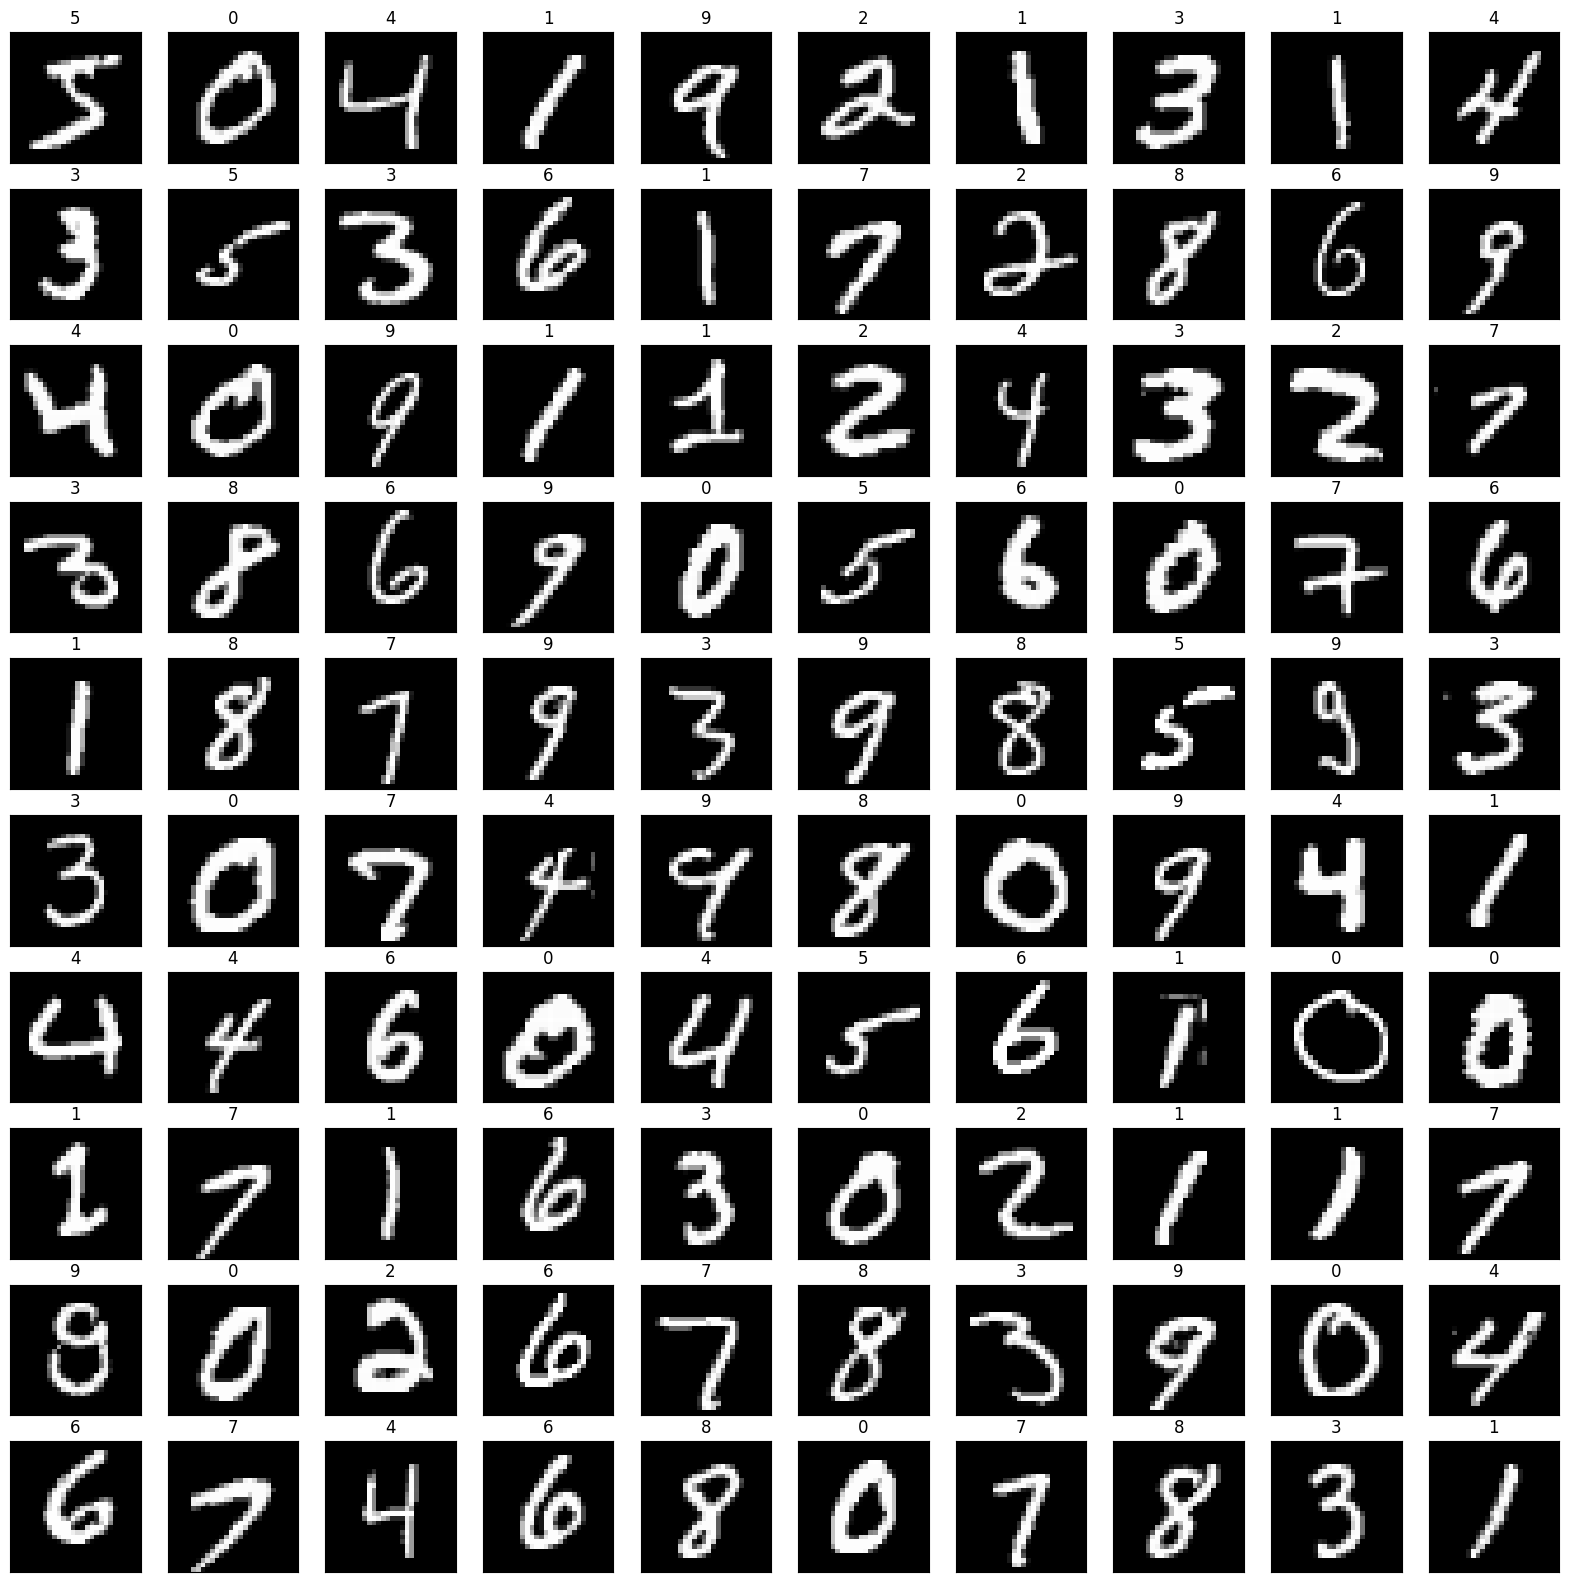

In [3]:
# visualize the first 100 images in the dataset

fig = plt.figure(figsize=(20, 20))
for i in range(100):
    ax = fig.add_subplot(10, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]), cmap='gray')
    ax.set_title(str(np.argmax(y_train[i])))


In [4]:
# check the shape of the dataset

print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)

x_train shape: (60000, 28, 28, 1)
y_train shape: (60000, 10)


In [5]:
# check for null values

print('x_train null values:', np.isnan(x_train).sum())
print('y_train null values:', np.isnan(y_train).sum())

x_train null values: 0
y_train null values: 0


In [6]:
# build the model

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))

# flatten the model

model.add(Flatten())

In [7]:
# connect the model to a dense layer

model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

In [8]:
# compile the model

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
# train the model

model_history = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=128, epochs=50, verbose=2)

Epoch 1/50
469/469 - 22s - loss: 0.0014 - accuracy: 0.9997 - val_loss: 0.0439 - val_accuracy: 0.9933 - 22s/epoch - 47ms/step
Epoch 2/50
469/469 - 22s - loss: 6.1858e-04 - accuracy: 0.9999 - val_loss: 0.0494 - val_accuracy: 0.9922 - 22s/epoch - 46ms/step
Epoch 3/50
469/469 - 22s - loss: 7.8185e-05 - accuracy: 1.0000 - val_loss: 0.0489 - val_accuracy: 0.9939 - 22s/epoch - 46ms/step
Epoch 4/50
469/469 - 22s - loss: 0.0012 - accuracy: 0.9997 - val_loss: 0.0717 - val_accuracy: 0.9915 - 22s/epoch - 46ms/step
Epoch 5/50
469/469 - 22s - loss: 0.0045 - accuracy: 0.9987 - val_loss: 0.0532 - val_accuracy: 0.9920 - 22s/epoch - 47ms/step
Epoch 6/50
469/469 - 22s - loss: 0.0021 - accuracy: 0.9994 - val_loss: 0.0525 - val_accuracy: 0.9928 - 22s/epoch - 47ms/step
Epoch 7/50
469/469 - 22s - loss: 5.5381e-04 - accuracy: 0.9998 - val_loss: 0.0474 - val_accuracy: 0.9933 - 22s/epoch - 46ms/step
Epoch 8/50
469/469 - 22s - loss: 1.2271e-04 - accuracy: 1.0000 - val_loss: 0.0474 - val_accuracy: 0.9937 - 22s/ep

In [13]:
# evaluate the model

model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0623 - accuracy: 0.9937


[0.06232210248708725, 0.9937000274658203]

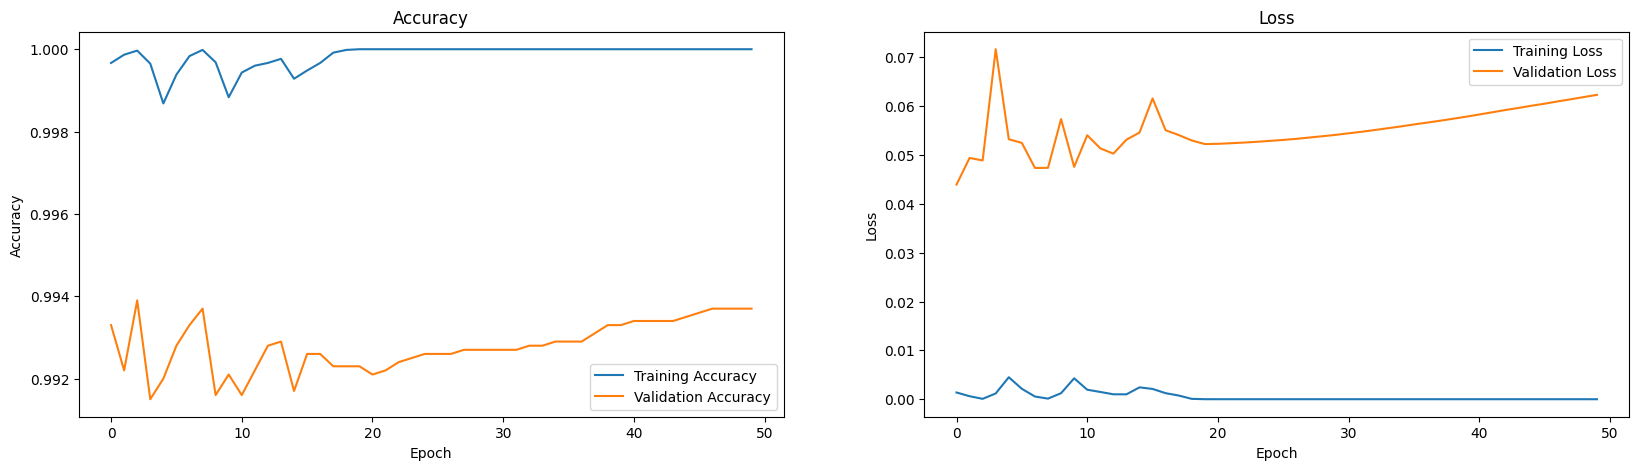

In [14]:
# plot the accuracy and loss

# Plot the accuracy
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

axes[0].plot(model_history.history['accuracy'], label='Training Accuracy')
axes[0].plot(model_history.history['val_accuracy'], label='Validation Accuracy')
axes[0].set_title('Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

# Plot the loss
axes[1].plot(model_history.history['loss'], label='Training Loss')
axes[1].plot(model_history.history['val_loss'], label='Validation Loss')
axes[1].set_title('Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()

plt.show()

In [15]:
# check for misclassified images

y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)

misclassified_idx = np.where(y_pred != y_test)[0]
print('Number of misclassified images = ', len(misclassified_idx))

313/313 [==============================] - 2s 5ms/step
Number of misclassified images =  63


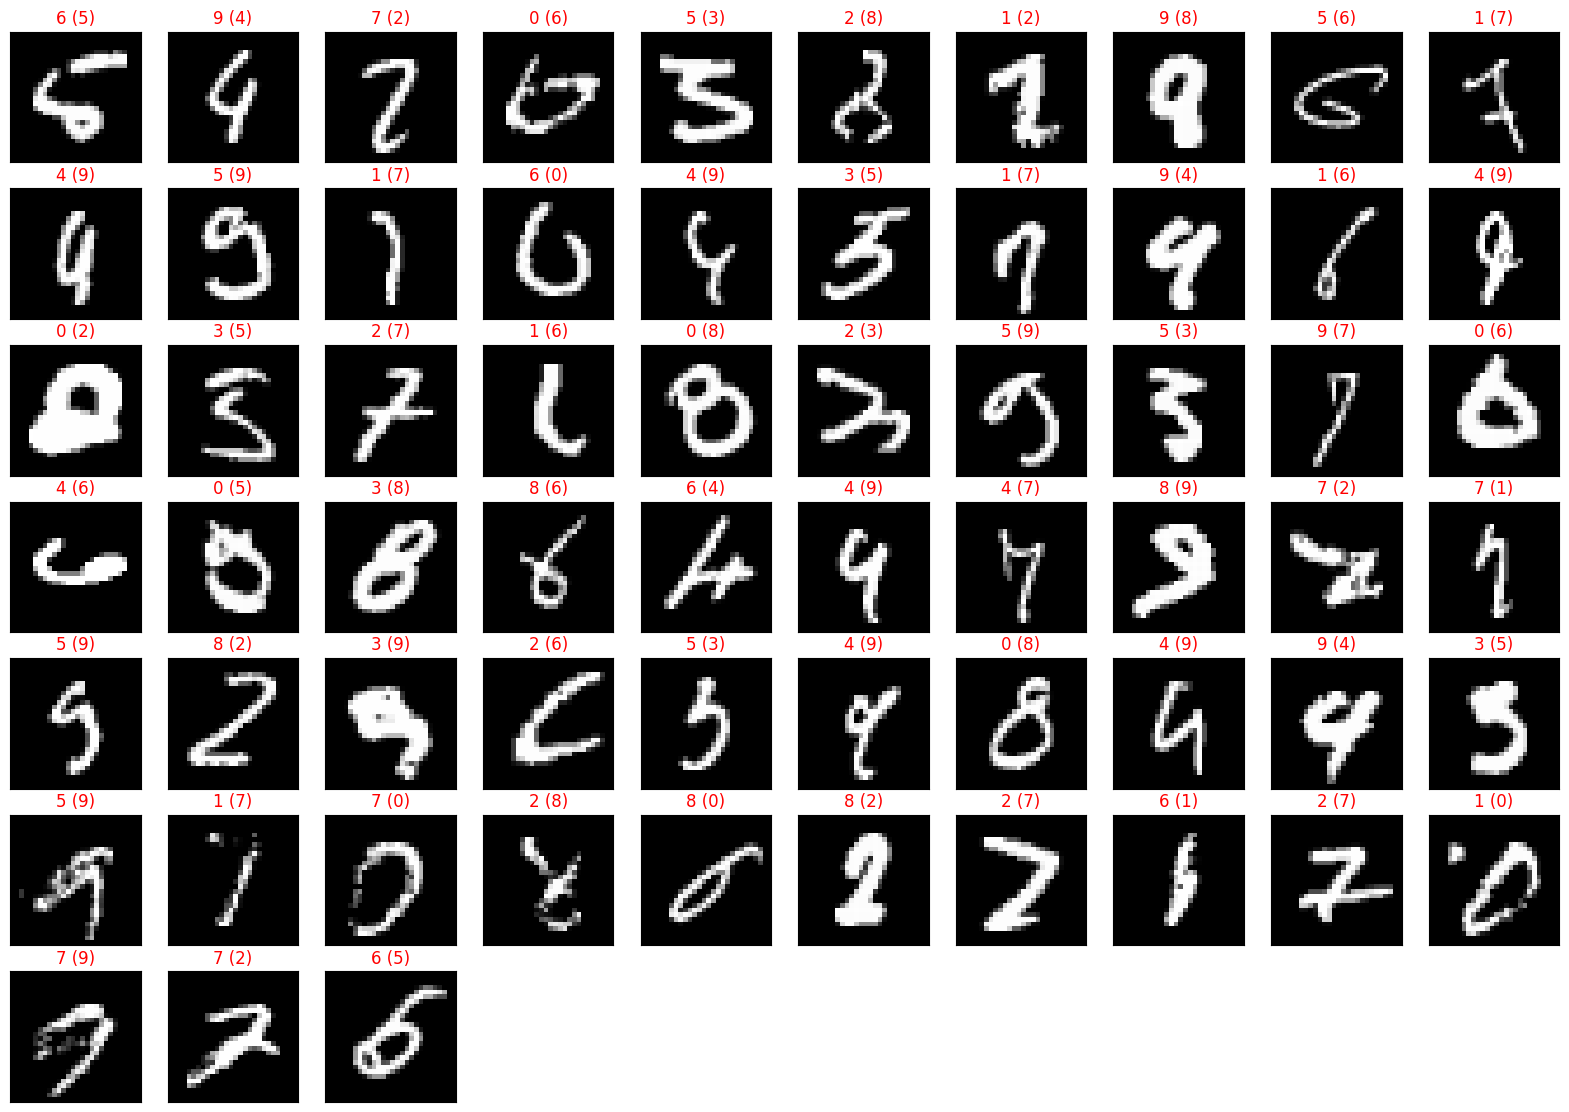

In [16]:
# visualize the misclassified images

fig = plt.figure(figsize=(20, 20))
for i, idx in enumerate(misclassified_idx[:100]):
    ax = fig.add_subplot(10, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]), cmap='gray')
    ax.set_title('{} ({})'.format(y_pred[idx], y_test[idx]), color='red')


In [ ]:
# no need for grid search as the model is already performing well

# save the model

model.save('mnist.h5')